## Homework3: Improve/evaluate/interpret your midterm project

This is not a group project. This is an individual's two weeks homework

### Your tasks


1. Data cleaning and preparation. Be careful with those missing data and outliers.
2. Use the feature engineering techniques to create 10 new features and give your rationals. It can be common sense, or statistics or by any techniques in last class.
3. Use your new features to predict the home price. You will use RandomForestRegressor as shown in the class.
4. Try different new features to improve the model performance. Choose the appropriate performance matrics. Show your improvement.
5. Use Shapley summary plot to explain your model.
6. Submit all in a Jupyter file and HTML format on canvas

In [65]:
import numpy as np
import pandas as pd

##### Read in the data

In [66]:
train_data = pd.read_csv("data/train.csv")

In [67]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [68]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 1. Data cleaning and preparation. Be careful with those missing data and outliers.

##### Seperating numerical and categorical column names

In [69]:
numerical_data = train_data.describe().columns
categorical_data_column_names = set(train_data.columns)-set(numerical_data) 

In [71]:
categorical_data_column_names

{'Alley',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'Neighborhood',
 'PavedDrive',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities'}

##### Label Encoder

In [72]:
from sklearn import preprocessing
for name in categorical_data_column_names:
    le = preprocessing.LabelEncoder()
    x = train_data[name].values
    le.fit(x)
    train_data[name] = le.transform(x)

##### Hot Encoded categorical data

In [47]:
# from sklearn.preprocessing import OneHotEncoder
# for cat_name in categorical_data_column_names:
#     #print(cat_name)
#     cat = pd.DataFrame(train_data[cat_name])
#     enc = OneHotEncoder()
#     #need to be given as data frame
#     enc.fit(cat)
#     X_enc = enc.transform(cat).toarray()
#     X_enc
#     df = pd.DataFrame(X_enc,columns=enc.get_feature_names(cat.columns))
#     train_data = train_data.join(df)
#     train_data.drop(cat_name,axis=1,inplace=True)

In [73]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   Alley          1460 non-null   int64  
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   int64  
 10  LotConfig      1460 non-null   int64  
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int64  
 13  Condition1     1460 non-null   int64  
 14  Condition2     1460 non-null   int64  
 15  BldgType       1460 non-null   int64  
 16  HouseStyle     1460 non-null   int64  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##### Replacing the NA numerical data 

In [49]:
train_data["LotFrontage"].fillna(train_data["LotFrontage"].mode()[0],inplace=True)
train_data["MasVnrArea"].fillna(0,inplaace=True)

In [74]:
from sklearn.impute import SimpleImputer
values = train_data.values
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
transformed_values = imp.fit_transform(values)
imp.fit(train_data)
train_data= pd.DataFrame(imp.transform(train_data))
train_data = train_data.applymap(np.int64)
train_data.columns = column_names

TypeError: Index(...) must be called with a collection of some kind, 'SalePrice' was passed

##### Drop NA values

In [50]:
train_data = train_data.dropna()

In [51]:
checker = train_data.isnull().sum()/len(train_data)*100
checker[checker > 0]

Series([], dtype: float64)

In [52]:
numerical_data_column_names = train_data[numerical_data].columns

In [53]:
train_data[numerical_data_column_names].describe().columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

After viewing the described data it fair to say that there are outliers in the below column names 

In [54]:
train_data[numerical_data_column_names].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,...,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.00000
mean,731.879623,56.022480,68.730964,10695.812183,6.187092,5.577955,1972.958666,1985.435098,108.364757,455.578680,...,97.456853,47.276287,21.039159,3.609862,15.945613,2.920957,42.889050,6.334300,2007.812183,185479.51124
std,421.059059,41.026897,22.316778,10214.702133,1.345780,1.081031,29.379883,20.444852,184.195220,459.691379,...,126.699192,65.210465,60.535107,30.154682,57.249593,41.335545,501.613931,2.696674,1.330221,79023.89060
min,1.000000,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.00000
25%,366.500000,20.000000,60.000000,7741.000000,5.000000,5.000000,1955.000000,1968.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,134000.00000
50%,734.000000,50.000000,64.000000,9591.000000,6.000000,5.000000,1976.000000,1994.000000,0.000000,400.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,167500.00000
75%,1094.500000,70.000000,79.000000,11708.500000,7.000000,6.000000,2001.000000,2004.000000,170.500000,732.000000,...,171.000000,69.500000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,217750.00000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.00000


In [55]:
train_data[numerical_data_column_names].describe().iloc[:,list(range(30,38))]

,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.00000
mean,21.039159,3.609862,15.945613,2.920957,42.889050,6.334300,2007.812183,185479.51124
std,60.535107,30.154682,57.249593,41.335545,501.613931,2.696674,1.330221,79023.89060
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,134000.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,167500.00000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,217750.00000
max,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.00000


##### Handling Outliers

In [56]:
outlier_column_names = ["LotFrontage","LotArea","SalePrice"]

60.0 79.0 19.0
7820.0 11500.0 3680.0
133800.0 214000.0 80200.0


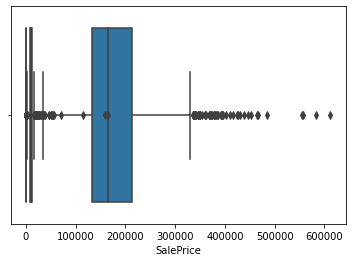

In [57]:
outlier_column_names = ["LotFrontage","LotArea","SalePrice"]
for column_names in outlier_column_names:
    import seaborn as sns
    sns.boxplot(x=train_data[column_names])
    upper_lim = train_data[column_names].quantile(.95)
    lower_lim = train_data[column_names].quantile(.05) # Top 5% means here the values that are out of the 95th percentile of data
    train_data[(train_data[column_names] < upper_lim) & (train_data[column_names] > lower_lim)]
    Q1 = train_data[column_names].quantile(0.25)
    Q3 = train_data[column_names].quantile(0.75)
    IQR = Q3 - Q1
    print(Q1, Q3, IQR)
    train_data = train_data[(train_data[column_names] < (Q3 + 1.5 * IQR)) & (train_data[column_names] > (Q1 - 1.5 * IQR))]

<AxesSubplot:xlabel='SalePrice'>

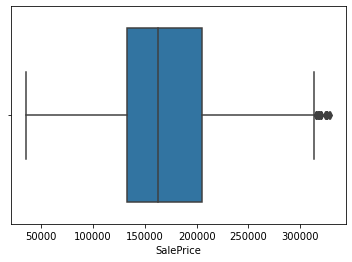

In [58]:
import seaborn as sns
sns.boxplot(x=train_data["SalePrice"])

<AxesSubplot:xlabel='LotArea'>

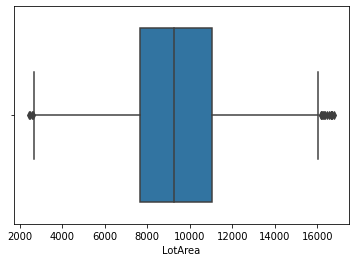

In [59]:
sns.boxplot(x=train_data["LotArea"])

In [62]:
train_data["HouseStyle"]

0       5
1       2
2       5
3       5
4       5
       ..
1455    5
1456    2
1457    5
1458    2
1459    2
Name: HouseStyle, Length: 1164, dtype: int64

In [63]:
train_data["Electrical"]

0       4
1       4
2       4
3       4
4       4
       ..
1455    4
1456    4
1457    4
1458    0
1459    4
Name: Electrical, Length: 1164, dtype: int64

In [ ]:
train_data[""]

In [98]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,BsmtFinType1_Unf,BsmtFinType1_nan,CentralAir_N,CentralAir_Y,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_nan,Street_Grvl,Street_Pave
count,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,...,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.0,1164.000000,1164.000000
mean,733.473368,53.436426,66.716495,9329.644330,6.047251,5.619416,1971.285223,1984.460481,89.534364,418.898625,...,0.292955,0.024055,0.055842,0.944158,0.225945,0.317869,0.456186,0.0,0.000859,0.999141
std,421.368832,37.468867,14.200155,2751.804354,1.228216,1.083132,29.640832,20.677917,156.323632,399.456800,...,0.455314,0.153286,0.229715,0.229715,0.418383,0.465849,0.498291,0.0,0.029311,0.029311
min,1.000000,20.000000,32.000000,2448.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,368.750000,20.000000,60.000000,7672.250000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
50%,740.500000,50.000000,63.000000,9274.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,385.500000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
75%,1096.500000,70.000000,76.000000,11031.750000,7.000000,6.000000,2000.000000,2003.000000,146.250000,690.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.0,0.000000,1.000000
max,1460.000000,190.000000,107.000000,16770.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,1880.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


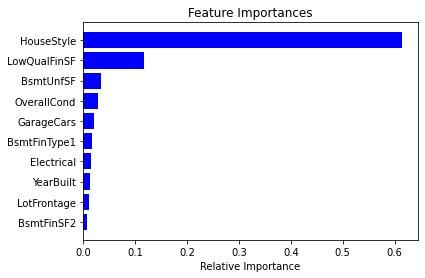

In [61]:
##### Feature Importance (Random Forrest)
x = train_data.drop(["Id","SalePrice"],axis=1)
y = train_data["SalePrice"]
# x = trial.drop(['SalePrice',"Id"],axis=1)
# y = trial["SalePrice"]
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
import matplotlib.pyplot as plt
model = RandomForestRegressor(n_estimators=100)
model.fit(x,y)
dict_importantance = dict(reversed(sorted(zip(model.feature_importances_, train_data.columns.values))))
features = train_data.drop(["SalePrice"],axis=1).columns
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [99]:
from sklearn.feature_selection import SelectKBest, f_regression
X = train_data.drop(["Id","SalePrice"],axis=1)
get_cols_loan = X.columns
y = train_data["SalePrice"]
#Select the top features in the dataset
feature_selector = SelectKBest(f_regression,k=100)
feature_selector.fit(X, y)
f_scores = pd.DataFrame(list(zip(get_cols_loan, feature_selector.scores_, feature_selector.pvalues_)),
                           columns=['ftr', 'score', 'pval']).dropna(axis=0)
f_scores = pd.DataFrame(f_scores)

#This will select the top features with the best F-scores
kbest = np.asarray(get_cols_loan)[feature_selector.get_support()]
kbest

/Users/mwoo/opt/anaconda3/envs/py3_base/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


array(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'LotShape_IR1', 'LotShape_Reg', 'MasVnrType_BrkFace',
       'MasVnrType_None', 'MasVnrType_Stone', 'GarageCond_Fa',
       'GarageCond_TA', 'HeatingQC_Ex', 'HeatingQC_TA',
       'HouseStyle_1.5Fin', 'HouseStyle_2Story', 'BsmtQual_Ex',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtQual_nan',
       'Exterior1st_CemntBd', 'Exterior1st_MetalSd',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'SaleCondition_Partial', 'GarageQual_Fa', 'GarageQual_TA',
       'KitchenQual_Ex', 'KitchenQual_Gd', 'KitchenQual_TA',
       'PavedDrive_N', 'PavedDrive_Y', 'Foundation_BrkTil',
       'Founda

In [100]:
kbest

array(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'LotShape_IR1', 'LotShape_Reg', 'MasVnrType_BrkFace',
       'MasVnrType_None', 'MasVnrType_Stone', 'GarageCond_Fa',
       'GarageCond_TA', 'HeatingQC_Ex', 'HeatingQC_TA',
       'HouseStyle_1.5Fin', 'HouseStyle_2Story', 'BsmtQual_Ex',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtQual_nan',
       'Exterior1st_CemntBd', 'Exterior1st_MetalSd',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'SaleCondition_Partial', 'GarageQual_Fa', 'GarageQual_TA',
       'KitchenQual_Ex', 'KitchenQual_Gd', 'KitchenQual_TA',
       'PavedDrive_N', 'PavedDrive_Y', 'Foundation_BrkTil',
       'Founda

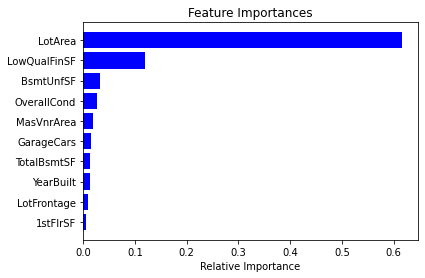

In [101]:
##### Feature Importance (Random Forrest)
x = train_data.drop(["Id","SalePrice"],axis=1)
y = train_data["SalePrice"]
# x = trial.drop(['SalePrice',"Id"],axis=1)
# y = trial["SalePrice"]
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
import matplotlib.pyplot as plt
model = RandomForestRegressor(n_estimators=100)
model.fit(x,y)
dict_importantance = dict(reversed(sorted(zip(model.feature_importances_, train_data.columns.values))))
features = train_data.drop(["SalePrice"],axis=1).columns
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

##### Principal Component Analysis (Dimensional Reduction)

In [102]:
from sklearn.preprocessing import StandardScaler
variables = train_data.columns
x = train_data.loc[:, variables].values
y = train_data.loc[:,['SalePrice']].values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,...,296,297,298,299,300,301,302,303,304,305
0,-1.739066,0.175249,-0.120931,-0.319798,0.776052,-0.572121,1.070429,0.896971,0.681352,0.719038,...,-0.643691,-0.156996,-0.243197,0.243197,-0.540276,1.464905,-0.915894,0.0,-0.029323,0.029323
1,-1.736692,-0.892762,0.935850,0.098289,-0.038488,2.198817,0.159132,-0.409331,-0.572996,1.400256,...,-0.643691,-0.156996,-0.243197,0.243197,-0.540276,1.464905,-0.915894,0.0,-0.029323,0.029323
2,-1.734318,0.175249,0.090426,0.698153,0.776052,-0.572121,1.002926,0.848589,0.463761,0.168054,...,-0.643691,-0.156996,-0.243197,0.243197,-0.540276,1.464905,-0.915894,0.0,-0.029323,0.029323
3,-1.731943,0.442252,-0.473191,0.080111,0.776052,-0.572121,-1.899725,-0.699621,-0.572996,-0.508155,...,-0.643691,-0.156996,-0.243197,0.243197,-0.540276,-0.682638,1.091829,0.0,-0.029323,0.029323
4,-1.729569,0.175249,1.217658,1.792451,1.590591,-0.572121,0.969174,0.751826,1.666911,0.591310,...,-0.643691,-0.156996,-0.243197,0.243197,-0.540276,1.464905,-0.915894,0.0,-0.029323,0.029323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,1.715450,0.175249,-0.332287,-0.513573,-0.038488,-0.572121,0.935422,0.751826,-0.572996,-1.049121,...,1.553541,-0.156996,-0.243197,0.243197,-0.540276,1.464905,-0.915894,0.0,-0.029323,0.029323
1160,1.717824,-0.892762,1.288110,1.397995,-0.038488,0.351525,0.226635,0.171247,0.188572,0.929414,...,-0.643691,-0.156996,-0.243197,0.243197,-0.540276,-0.682638,1.091829,0.0,-0.029323,0.029323
1161,1.720199,0.442252,-0.050479,-0.104574,0.776052,3.122462,-1.022179,1.042115,-0.572996,-0.360391,...,-0.643691,-0.156996,-0.243197,0.243197,-0.540276,1.464905,-0.915894,0.0,-0.029323,0.029323
1162,1.722573,-0.892762,0.090426,0.140825,-0.853027,0.351525,-0.718413,0.558300,-0.572996,-0.926402,...,-0.643691,-0.156996,-0.243197,0.243197,-0.540276,-0.682638,1.091829,0.0,-0.029323,0.029323


In [103]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,296,297,298,299,300,301,302,303,304,305
0,-4.682781,1.199389,0.217862,-0.019660,-2.916321,0.319671,-0.360942,1.442101,-0.101762,-0.458835,...,2.418250e-16,-4.328761e-16,-1.269740e-16,-4.672817e-16,-2.462935e-16,-2.461637e-16,5.797453e-16,-9.934552e-18,6.378109e-17,-8.179811e-17
1,-0.246619,-3.287261,-0.392816,-0.132110,-0.194492,1.092493,0.350187,0.011890,-0.478630,-1.145552,...,-2.773027e-16,1.267598e-15,-3.700836e-16,2.300897e-17,1.190697e-17,-2.934122e-16,2.485028e-16,2.354974e-16,-2.098941e-17,2.799229e-17
2,-5.548681,0.708016,0.112838,1.198490,-2.378492,0.698761,0.638175,1.932931,-0.179459,-0.459323,...,2.819987e-16,4.684554e-16,8.704341e-17,-2.438258e-16,-1.513340e-16,-7.553741e-16,-5.240030e-16,3.206829e-16,3.223881e-17,6.251394e-17
3,1.835747,1.773654,-1.127314,2.031277,-0.084699,-0.499579,1.983844,-0.555643,-0.647341,-0.091987,...,3.921933e-16,2.903063e-16,1.948322e-16,4.437377e-17,2.150841e-16,-1.289727e-16,-9.909924e-17,7.194526e-17,5.577881e-17,-7.457298e-17
4,-7.289081,0.523064,0.035435,3.990559,-1.425211,0.766182,0.203579,2.003673,0.550212,-1.361066,...,-2.915840e-16,8.159318e-16,-9.167094e-16,-2.701683e-16,-1.977864e-16,-8.837852e-17,2.173367e-16,-9.693563e-17,3.565073e-17,1.828030e-17


### Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data.
This can be determined by looking at the cumulative *explained variance ratio* as a function of the number of components:

In [104]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([6.55799542e-02, 3.09005820e-02, 2.64959785e-02, 2.24052578e-02,
       1.73740056e-02, 1.53594093e-02, 1.38844968e-02, 1.37320321e-02,
       1.28710879e-02, 1.25827489e-02, 1.16523852e-02, 1.14798514e-02,
       1.11968572e-02, 1.07072136e-02, 1.03001518e-02, 1.02083959e-02,
       1.00603639e-02, 9.68627616e-03, 9.37175952e-03, 9.25347708e-03,
       9.04361135e-03, 8.88215376e-03, 8.79744980e-03, 8.68653596e-03,
       8.48995040e-03, 8.29084738e-03, 8.20230292e-03, 8.03308153e-03,
       7.79517831e-03, 7.72741655e-03, 7.70354912e-03, 7.52610818e-03,
       7.43776177e-03, 7.35804633e-03, 7.11330947e-03, 7.04886821e-03,
       6.92028112e-03, 6.89988718e-03, 6.76504985e-03, 6.63966571e-03,
       6.57901453e-03, 6.38535924e-03, 6.34447958e-03, 6.22788294e-03,
       6.12006140e-03, 6.03874754e-03, 5.91918040e-03, 5.87921278e-03,
       5.82893023e-03, 5.81335174e-03, 5.69859377e-03, 5.62836864e-03,
       5.53083769e-03, 5.46879167e-03, 5.42761935e-03, 5.31656566e-03,
      

In [105]:
rslt = np.cumsum(pca.explained_variance_ratio_)
rslt

array([0.06557995, 0.09648054, 0.12297651, 0.14538177, 0.16275578,
       0.17811519, 0.19199968, 0.20573172, 0.2186028 , 0.23118555,
       0.24283794, 0.25431779, 0.26551465, 0.27622186, 0.28652201,
       0.29673041, 0.30679077, 0.31647705, 0.32584881, 0.33510229,
       0.3441459 , 0.35302805, 0.3618255 , 0.37051204, 0.37900199,
       0.38729283, 0.39549514, 0.40352822, 0.4113234 , 0.41905081,
       0.42675436, 0.43428047, 0.44171823, 0.44907628, 0.45618959,
       0.46323846, 0.47015874, 0.47705862, 0.48382367, 0.49046334,
       0.49704235, 0.50342771, 0.50977219, 0.51600008, 0.52212014,
       0.52815889, 0.53407807, 0.53995728, 0.54578621, 0.55159956,
       0.55729815, 0.56292652, 0.56845736, 0.57392615, 0.57935377,
       0.58467034, 0.58992086, 0.59514473, 0.60027101, 0.60537737,
       0.6104488 , 0.61547795, 0.62047412, 0.62536054, 0.63020389,
       0.63498651, 0.63975812, 0.64449096, 0.64918197, 0.65387158,
       0.65844306, 0.66297735, 0.66744756, 0.67189908, 0.67625

In [106]:
np.where(rslt < 0.99)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

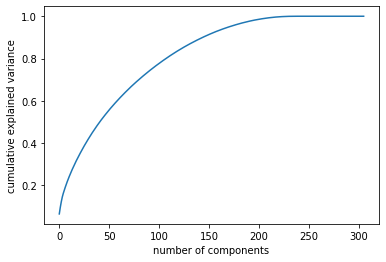

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(list(range(0,len(np.cumsum(pca.explained_variance_ratio_)))), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [108]:
pca_train_data = train_data.iloc[:,list(range(0,205))]
np.array(pca_train_data.columns)
pca_train_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Fence_MnPrv,Fence_MnWw,Fence_nan,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Decision Tree Regression

In [109]:
from sklearn import tree
from sklearn.model_selection import train_test_split
# x = train_data[random_for_ftr]
# y = train_data["SalePrice"]
x = pca_train_data.drop(["Id",'SalePrice'],axis=1).values
y = train_data["SalePrice"]
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
pipe = make_pipeline(StandardScaler(),tree.DecisionTreeRegressor())
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 20805.211428571427
Mean Squared Error: 861474604.9028572
Root Mean Squared Error: 29350.88763398574
R-squared Error: 0.7309556794380065


In [110]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
957,132000,133700.0
126,128000,105500.0
974,167500,222500.0
845,171000,144500.0
950,129000,129900.0


##### Support Vector Regression

In [111]:
from sklearn import svm
from sklearn.pipeline import make_pipeline
x = pca_train_data.drop(["Id",'SalePrice'],axis=1).values
y = train_data["SalePrice"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
pipe = make_pipeline(svm.SVR(kernel='linear'))
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
# regr = svm.SVR(kernel="linear")
# regr.fit(x_train,y_train)
# y_pred = regr.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 18010.89982288189
Mean Squared Error: 639895709.3617847
Root Mean Squared Error: 25296.15997264772
R-squared Error: 0.800156260700001


In [112]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
957,132000,134439.856027
126,128000,133582.482184
974,167500,175577.028058
845,171000,206804.379604
950,129000,140641.997200


##### KNN Regressor

In [113]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
x = pca_train_data.drop(["Id",'SalePrice'],axis=1).values
y = train_data["SalePrice"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
pipe = make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=9))
# neigh = KNeighborsRegressor(n_neighbors=7)
# neigh.fit(x_train, y_train)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 21113.185714285715
Mean Squared Error: 872919887.2832806
Root Mean Squared Error: 29545.21767195633
R-squared Error: 0.7273812406743376


In [114]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
957,132000,128312.000000
126,128000,147722.222222
974,167500,156388.888889
845,171000,145311.111111
950,129000,139977.777778


Foward_Algorithm

In [115]:
train_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,BsmtFinType1_Unf,BsmtFinType1_nan,CentralAir_N,CentralAir_Y,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_nan,Street_Grvl,Street_Pave
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
x = train_data[kbest]
y = train_data["SalePrice"]
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
pipe = make_pipeline(StandardScaler(),RandomForestRegressor())
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 14747.709200000001
Mean Squared Error: 445704286.1837388
Root Mean Squared Error: 21111.709693526453
R-squared Error: 0.860803549906855


In [117]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
957,132000,129190.91
126,128000,129216.50
974,167500,201613.25
845,171000,189757.37
950,129000,122591.50
